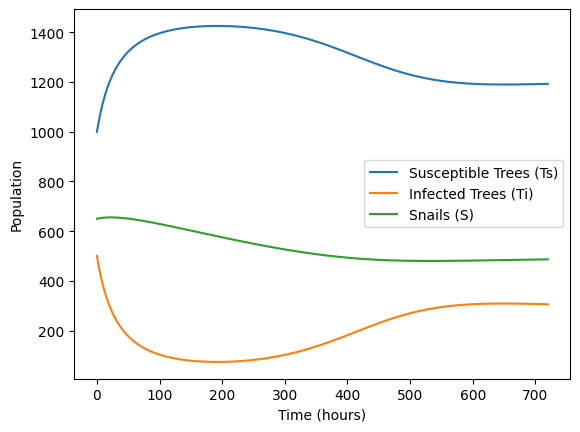

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameters
a = 4.913e-8  # Natural growth rate of coffee tree population
b = 4.340e-6  # Rate at which snail population grows due to consumption of rust-infected coffee trees[^7^][7]
beta = 5.174e-5  # Infection rate of coffee trees by rust
gamma = 8.681e-6  # Rate at which infected coffee trees die due to the pathogen
k = 1.273e-4  # Recovery rate of infected coffee trees by snails[^8^][8]
d = 1.250e-3  # Natural decay rate of the snail population

# Initial conditions
Ts0 = 1000  # Initial number of rust-susceptible coffee trees[^9^][9]
Ti0 = 500   # Initial number of rust-infected coffee trees[^10^][10]
S0 = 650    # Initial number of snails

# Time vector
t = np.linspace(0, 720, 720)  # Simulation for 720 hours (30 days)

# The model equations
def model(y, t, a, b, beta, gamma, k, d):
    Ts, Ti, S = y
    dTsdt = a * Ts - beta * Ts * Ti + k * S * Ti
    dTidt = beta * Ts * Ti - k * S * Ti - gamma * Ti
    dSdt = b * S * Ti - d * S
    return [dTsdt, dTidt, dSdt]

# Initial conditions vector
y0 = [Ts0, Ti0, S0]

# Integrate the ODEs
solution = odeint(model, y0, t, args=(a, b, beta, gamma, k, d))

# Plot the results
plt.figure()
plt.plot(t, solution[:, 0], label='Susceptible Trees (Ts)')
plt.plot(t, solution[:, 1], label='Infected Trees (Ti)')
plt.plot(t, solution[:, 2], label='Snails (S)')
plt.xlabel('Time (hours)')
plt.ylabel('Population')
plt.legend()
plt.show()




In [ ]:
# Assuming your data is stored in separate arrays
Ts_data = np.array([...])  # Surface temperature data
Ti_data = np.array([...])  # Internal temperature data

# Combine the data into a single input array
X_train = np.hstack([Ts_data, Ti_data])

# Prepare the target array
y_train = np.array([...])  # Rate of change of Ts data

In [ ]:
#  A PINN model on the eq:  𝑑𝑇𝑠/𝑑𝑡 = 𝑎𝑇𝑠 −𝛽𝑇𝑠𝑇𝑖 +𝑘𝑆𝑇𝑖,


import numpy as np
import tensorflow as tf


# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='tanh', input_shape=(2,)),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dense(1)
])

# Define the physics-informed loss function
def custom_loss(y_true, y_pred):
    # Assuming y_true contains [Ts, Ti] and y_pred contains [dTs/dt]
    Ts, Ti = y_true[:, 0], y_true[:, 1]
    dTs_dt_pred = y_pred[:, 0]
    a, beta, k, S = 1.0, 1.0, 1.0, 1.0  # Example constants
    dTs_dt_true = a * Ts - beta * Ts * Ti + k * S * Ti
    return tf.reduce_mean(tf.square(dTs_dt_true - dTs_dt_pred))

# Compile the model
model.compile(optimizer='adam', loss=custom_loss)

# Prepare the data
# Note: You'll need to prepare your data accordingly
Ts_data = np.random.randint(350, 601, 100) # Surface susceptible coffee tree data
Ti_data = np.random.randint(200, 301, 70)  # Infected coffee tree data
X_train = np.hstack([Ts_data, Ti_data])
y_train = np.array([...])  # Rate of change of Ts data






 𝑑𝑇𝑠
 𝑑𝑡
= 𝑎𝑇𝑠 −𝛽𝑇𝑠𝑇𝑖 +𝑘𝑆𝑇𝑖,

 𝑑𝑇𝑖
 𝑑𝑡
= 𝛽𝑇𝑠𝑇𝑖 −𝑘𝑆𝑇𝑖 −𝛾𝑇𝑖,
 𝑑𝑆
 𝑑𝑡
= 𝑏𝑆𝑇𝑖 −𝑑𝑆.

In [ ]:
def system_of_equations(t, y):
    Ts, Ti, S = y  # Corrected line
    dTs_dt = a * Ts - beta * Ts * Ti + k * S * Ti
    dTi_dt = beta * Ts * Ti - k * S * Ti - gamma * Ti
    dS_dt = b * S * Ti - d * S
    return [dTs_dt, dTi_dt, dS_dt]

In [ ]:
def system_of_equations(t, y):
    Ts, Ti, S = y  # This line is incorrect
    dTs_dt = a * Ts - beta * Ts * Ti + k * S * Ti
    dTi_dt = beta * Ts * Ti - k * S * Ti - gamma * Ti
    dS_dt = b * S * Ti - d * S
    return [dTs_dt, dTi_dt, dS_dt]

In [ ]:
print(t_train.shape)

(1000, 1)


In [ ]:
p

In [ ]:
# Generate time data for training
t_test = np.linspace(0, 10, 100)
# Reshape t_train to be a 2D array with shape (num_samples, 1)
t_test = np.reshape(t_train, (-1, 1))

# Solve the system of equations using a numerical solver
solution = solve_ivp(system_of_equations, (0, 10), [Ts0, Ti0, S0], t_eval=t_train[:, 0])
y_test = solution.y.T

In [ ]:
y_pred = model.predict(t_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_pred.shape, y_test.shape

((1000, 1), (1000, 3))

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [ ]:
mean_squared_error(y_test[:,2],y_pred)

335043.19391713856

Epoch 1/1000
32/32 [==============================] - 2s 3ms/step - loss: 0.1098
Epoch 2/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0056
Epoch 3/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 4/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 5/1000
32/32 [==============================] - 0s 3ms/step - loss: 9.4990e-04
Epoch 6/1000
32/32 [==============================] - 0s 3ms/step - loss: 6.7186e-04
Epoch 7/1000
32/32 [==============================] - 0s 3ms/step - loss: 4.7260e-04
Epoch 8/1000
32/32 [==============================] - 0s 3ms/step - loss: 3.1859e-04
Epoch 9/1000
32/32 [==============================] - 0s 3ms/step - loss: 2.0527e-04
Epoch 10/1000
32/32 [==============================] - 0s 3ms/step - loss: 1.3559e-04
Epoch 11/1000
32/32 [==============================] - 0s 3ms/step - loss: 9.0735e-05
Epoch 12/1000
32/32 [==============================] - 0s 3ms/step - loss: 6.35

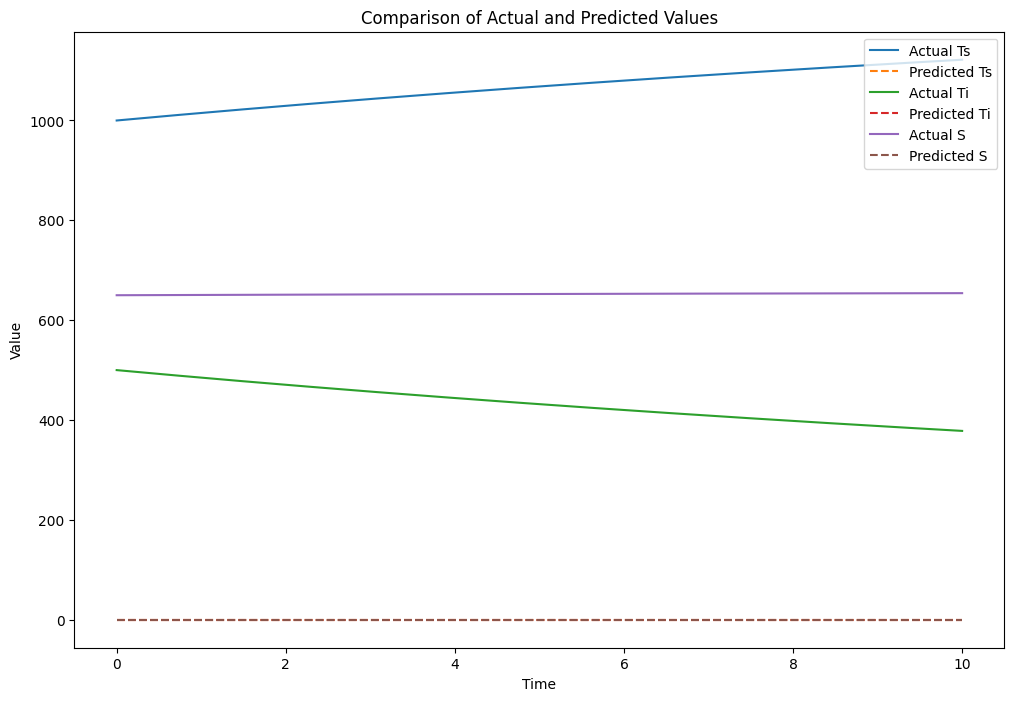

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the PINN model
class PINN(keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        # Define the layers
        self.hidden_layers = [
            layers.Dense(20, activation='tanh'),
            layers.Dense(20, activation='tanh'),
            layers.Dense(20, activation='tanh')
        ]
        # Output layer with 3 outputs (Ts, Ti, S)
        self.output_layer = layers.Dense(3)

    def call(self, t):
        # Forward pass through the network
        x = t
        for layer in self.hidden_layers:
            x = layer(x)
        # Output the results
        output = self.output_layer(x)
        return output

# Instantiate the model
model = PINN()

# Define parameters
a = 4.913e-8
b = 4.340e-6
beta = 5.174e-5
gamma = 8.681e-6
k = 1.273e-4
d = 1.250e-3

# Initial conditions
Ts0 = 1000
Ti0 = 500
S0 = 650

# Define the system of equations
def system_of_equations(t, y):
    Ts, Ti, S = y
    dTs_dt = a * Ts - beta * Ts * Ti + k * S * Ti
    dTi_dt = beta * Ts * Ti - k * S * Ti - gamma * Ti
    dS_dt = b * S * Ti - d * S
    return [dTs_dt, dTi_dt, dS_dt]

# Generate time data for training
t_train = np.linspace(0, 10, 1000)
# Reshape t_train to be a 2D array with shape (num_samples, 1)
t_train = np.reshape(t_train, (-1, 1))

# Solve the system of equations using a numerical solver
solution = solve_ivp(system_of_equations, (0, 10), [Ts0, Ti0, S0], t_eval=t_train[:, 0])
y_train = solution.y.T

# Define the loss function
def loss_function(y_true, y_pred):
    # Calculate residuals using the model's predictions
    with tf.GradientTape() as tape:
        # Watch the model's predictions (`y_pred`)
        tape.watch(y_pred)

        # Calculate the model's gradients with respect to the input time data
        gradients = tape.gradient(y_pred, model.trainable_variables)

    # Predicted values of Ts, Ti, and S
    Ts_pred = y_pred[:, 0]
    Ti_pred = y_pred[:, 1]
    S_pred = y_pred[:, 2]

    # True values of Ts, Ti, and S
    Ts_true = y_true[:, 0]
    Ti_true = y_true[:, 1]
    S_true = y_true[:, 2]

    # Calculate residuals
    residual_Ts = Ts_pred - (a * Ts_pred - beta * Ts_pred * Ti_pred + k * S_pred * Ti_pred)
    residual_Ti = Ti_pred - (beta * Ts_pred * Ti_pred - k * S_pred * Ti_pred - gamma * Ti_pred)
    residual_S = S_pred - (b * S_pred * Ti_pred - d * S_pred)

    # Combine residuals and mean squared error loss
    loss_residuals = tf.reduce_mean(residual_Ts**2 + residual_Ti**2 + residual_S**2)


    # Total loss is the sum of residuals loss and MSE loss
    total_loss = loss_residuals


    return total_loss


# Compile the model
optimizer = keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss=loss_function)

# Train the model
history = model.fit(t_train, y_train, epochs=1000, batch_size=32)

# Evaluate the model by comparing predictions with actual values
predicted_values = model(t_train)
Ts_pred = predicted_values[:, 0]
Ti_pred = predicted_values[:, 1]
S_pred = predicted_values[:, 2]

# Plot the predictions and actual values for comparison
plt.figure(figsize=(12, 8))

plt.plot(t_train[:, 0], y_train[:, 0], label='Actual Ts')
plt.plot(t_train[:, 0], Ts_pred, label='Predicted Ts', linestyle='dashed')

plt.plot(t_train[:, 0], y_train[:, 1], label='Actual Ti')
plt.plot(t_train[:, 0], Ti_pred, label='Predicted Ti', linestyle='dashed')

plt.plot(t_train[:, 0], y_train[:, 2], label='Actual S')
plt.plot(t_train[:, 0], S_pred, label='Predicted S', linestyle='dashed')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from scipy.integrate import solve_ivp

# Define the PINN model
class SnailPopulationPINN(keras.Model):
    def __init__(self):
        super(SnailPopulationPINN, self).__init__()
        # Define the layers
        self.hidden_layers = [
            layers.Dense(20, activation='tanh'),
            layers.Dense(20, activation='tanh'),
            layers.Dense(20, activation='tanh')
        ]
        # Output layer with 1 output (S)
        self.output_layer = layers.Dense(1)

    def call(self, inputs):
        # Forward pass through the network
        x = inputs
        for layer in self.hidden_layers:
            x = layer(x)
        # Output the result
        output = self.output_layer(x)
        return output

# Instantiate the model
model = SnailPopulationPINN()

# Parameters and initial conditions
a = 4.913e-8
b = 4.340e-6
beta = 5.174e-5
gamma = 8.681e-6
k = 1.273e-4
d = 1.250e-3
Ts0 = 1000
Ti0 = 500
S0 = 650

# Define the system of equations
def system_of_equations(t, y):
    Ts, Ti, S = y
    dTs_dt = a * Ts - beta * Ts * Ti + k * S * Ti
    dTi_dt = beta * Ts * Ti - k * S * Ti - gamma * Ti
    dS_dt = b * S * Ti - d * S
    return [dTs_dt, dTi_dt, dS_dt]

# Define the loss function
def loss_function(y_true, y_pred):
    # Calculate the loss as the negative of the snail population
    # Penalize low snail populations to ensure they have enough food to survive
    return -tf.reduce_mean(y_pred) + 0.01 * tf.nn.relu(-y_pred)

# Generate time data for training
t_train = np.linspace(0, 10, 1000)
# Reshape t_train to be a 2D array with shape (num_samples, 1)
t_train = np.reshape(t_train, (-1, 1))

# Solve the system of equations using a numerical solver
solution = solve_ivp(system_of_equations, (0, 10), [Ts0, Ti0, S0], t_eval=t_train[:, 0])
y_train = solution.y.T

# Print the training data for verification
print("Training data:")
print("Time (t):", t_train.shape)  # Should be (1000, 1)
print("System Variables (Ts, Ti, S):", y_train.shape)  # Should be (1000, 3)

# Compile the model
optimizer = keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss=loss_function)

# Train the model
history = model.fit(t_train, y_train[:, 2], epochs=1000, batch_size=32)

# Optimal snail population
optimal_snail_population = model.predict([[0]])[0][0]
print("Optimal snail population:", optimal_snail_population)


Training data:
Time (t): (1000, 1)
System Variables (Ts, Ti, S): (1000, 3)
Epoch 1/1000
32/32 [==============================] - 2s 3ms/step - loss: -1.2138
Epoch 2/1000
32/32 [==============================] - 0s 3ms/step - loss: -3.5649
Epoch 3/1000
32/32 [==============================] - 0s 3ms/step - loss: -5.5503
Epoch 4/1000
32/32 [==============================] - 0s 4ms/step - loss: -7.0741
Epoch 5/1000
32/32 [==============================] - 0s 3ms/step - loss: -8.1906
Epoch 6/1000
32/32 [==============================] - 0s 3ms/step - loss: -9.1313
Epoch 7/1000
32/32 [==============================] - 0s 2ms/step - loss: -9.9901
Epoch 8/1000
32/32 [==============================] - 0s 3ms/step - loss: -10.8045
Epoch 9/1000
32/32 [==============================] - 0s 3ms/step - loss: -11.5907
Epoch 10/1000
32/32 [==============================] - 0s 3ms/step - loss: -12.3574
Epoch 11/1000
32/32 [==============================] - 0s 3ms/step - loss: -13.1100
Epoch 12/1000
32/